In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(log_dir='pt_logs')
# Load the dataset and perform exploratory data analysis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()


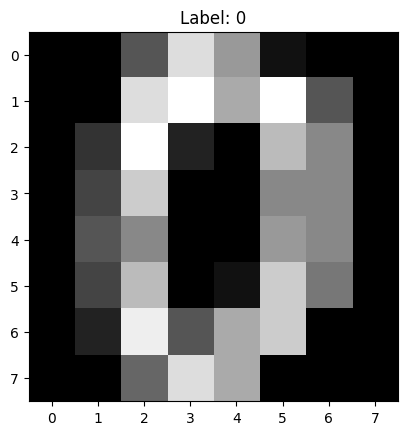

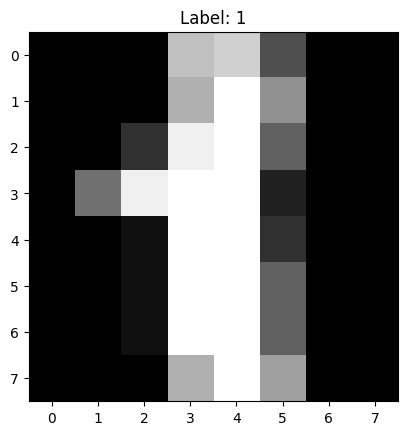

In [9]:
# Plot some examples of the images
for i in range(2):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.show()


In [10]:
# Prepare the data for training
X = digits.images.reshape(-1, 64)
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [11]:
# Define the model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [12]:
# Train the model
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_graph(model,data[0])

# Evaluate the model on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model


In [13]:
# %load_ext tensorboard
%reload_ext tensorboard
log_folder = './pt_logs'
%tensorboard --logdir={log_folder}

Launching TensorBoard...

KeyboardInterrupt: 